<h1><center>Computational Epidemiology - Problem Statement 3</center></h1>
<h2><center>Anirudh Rao</center></h2>

<h3>Data Preprocessing</h3>

First, we have to import the necessary libraries to build our regression model and then load in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PS3DataSet.csv")

In [3]:
data.rename(columns={"pIC50 (IC50 in microM)":"pIC50"},inplace=True)

In [4]:
data.head()

,Compound No.,SMILES,pIC50
0,1,FC1=CC(Cl)=C(CN2C(=O)C(=O)C3=CC(I)=CC=C23)C=C1,-0.973127854
1,2,CC1=NC(SCC(=O)NC2=CC=C(Cl)C=C2F)=NC(=C1)C(F)(F)F,-2.698970004
2,3,ClC1=CC(OC(=O)C2=CC3=C(OC2=O)C=CC=C3)=CN=C1,0.966576245
3,4,COC(=O)C1(C)CCCC2=C3C(=O)C(=O)C4=C(OC=C4C)C3=C...,-1.324282455
4,5,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,-1.176091259


Next, we have to load in the descriptors we generated using ChemDes.

In [5]:
descriptors = pd.read_csv("PS3Descriptors.csv").drop("Name",axis=1)

In [6]:
descriptors.head()

,nAcid,ALogP,ALogp2,AMR,nA,nR,nN,nD,nC,nF,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,1.6428,2.698792,93.4623,0,0,0,0,0,0,...,14.307836,42.640158,2.030484,16.234940,5.126131,3.503379,898.0,35.0,1.939,114.0
1,0,1.8127,3.285881,88.9575,0,0,0,0,0,0,...,11.147557,47.449052,1.977044,26.965144,2.541079,9.170576,1516.0,34.0,1.883,122.0
2,0,0.5982,0.357843,82.2506,0,0,0,0,0,0,...,10.379799,42.954881,2.045471,16.813633,11.287793,3.003056,956.0,32.0,1.281,110.0
3,0,0.2781,0.077340,93.4084,0,0,0,0,0,0,...,7.863149,51.283726,2.051349,13.431186,13.431186,0.000000,1291.0,53.0,1.891,144.0
4,0,2.9999,8.999400,135.3784,0,0,0,0,0,0,...,11.149124,69.087677,2.031991,33.349849,5.660856,12.405386,4276.0,51.0,3.363,180.0


We can concatenate the two dataframes in order to train our model.

In [7]:
df = pd.concat([data,descriptors],axis=1).set_index("Compound No.")

In [8]:
df.head()

,SMILES,pIC50,nAcid,ALogP,ALogp2,AMR,nA,nR,nN,nD,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Compound No.,,,,,,,,,,,,,,,,,,,,,
1,FC1=CC(Cl)=C(CN2C(=O)C(=O)C3=CC(I)=CC=C23)C=C1,-0.973127854,0,1.6428,2.698792,93.4623,0,0,0,0,...,14.307836,42.640158,2.030484,16.234940,5.126131,3.503379,898.0,35.0,1.939,114.0
2,CC1=NC(SCC(=O)NC2=CC=C(Cl)C=C2F)=NC(=C1)C(F)(F)F,-2.698970004,0,1.8127,3.285881,88.9575,0,0,0,0,...,11.147557,47.449052,1.977044,26.965144,2.541079,9.170576,1516.0,34.0,1.883,122.0
3,ClC1=CC(OC(=O)C2=CC3=C(OC2=O)C=CC=C3)=CN=C1,0.966576245,0,0.5982,0.357843,82.2506,0,0,0,0,...,10.379799,42.954881,2.045471,16.813633,11.287793,3.003056,956.0,32.0,1.281,110.0
4,COC(=O)C1(C)CCCC2=C3C(=O)C(=O)C4=C(OC=C4C)C3=C...,-1.324282455,0,0.2781,0.077340,93.4084,0,0,0,0,...,7.863149,51.283726,2.051349,13.431186,13.431186,0.000000,1291.0,53.0,1.891,144.0
5,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,-1.176091259,0,2.9999,8.999400,135.3784,0,0,0,0,...,11.149124,69.087677,2.031991,33.349849,5.660856,12.405386,4276.0,51.0,3.363,180.0


Now, we have to ensure we have no missing descriptor data.

In [9]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column)

MolIP


Since the 'MolIP' has missing values, we can drop it.

In [10]:
df = df.drop("MolIP", axis=1)

We can now divide our dataset into those with and without 'BLINDED' pIC50 values.

In [11]:
blinded = df[df["pIC50"] == "BLINDED"]

In [12]:
df = df[df["pIC50"] != "BLINDED"]

We have to cast the pIC50 values as floats in order to train the regression model.

In [13]:
df["pIC50"] = df["pIC50"].astype(float)

Next, we split the data into features and label. The features would be the descriptors while the label would be the pIC50 value to be predicted.

In [14]:
X = df.drop(["SMILES","pIC50"],axis=1)
y = df["pIC50"]

We have to split the data into training and testing set to ensure fair model evaluation.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Since the features are of different magnitudes, we have to scale our data.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

<h3>Model Training</h3>

We will use a <b>Gradient Boosting Regressor</b> for our QSAR model.

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
model = GradientBoostingRegressor(random_state=42)

We have to train our model and then validate it using the test data.
<br>
We can use <b>leave-one-out cross validation</b> during the training phase to obtain additional statistics about model performance.

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
loo_pred = cross_val_predict(model, X_train, y_train, cv=len(X_train))

In [25]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
test_pred = model.predict(X_test)

<h3>Model Validation</h3>

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

From the LOO cross validation, we can obtain the LOO-Q2 score.

In [28]:
loo_q2 = r2_score(y_train,loo_pred)
loo_q2

0.48454091932262344

From the test set, we can obtain the R2 score, mean absolute error (MAE) and root mean square error (RMSE).

In [29]:
r2 = r2_score(y_test,test_pred)
r2

0.7738387327560978

In [30]:
mae = mean_absolute_error(y_test,test_pred)
mae

0.2711474203986557

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,test_pred))
rmse

0.34869274054976884

We can compare our RMSE to the standard deviation of our pIC50 values to decide if our model is performing well.

In [32]:
df["pIC50"].describe()

count    84.000000
mean     -1.080404
std       0.839463
min      -2.698970
25%      -1.554140
50%      -1.167227
75%      -0.694989
max       1.200659
Name: pIC50, dtype: float64

As our RMSE is significantly lower than the standard deviation, we can say that our model is performing fairly well.

We can also check the correlation coefficient between the true and predicted pIC50 values in our test set.

In [33]:
pred = pd.concat([pd.DataFrame(y_test).reset_index(),pd.DataFrame(test_pred)],axis=1).set_index("Compound No.").rename(columns={0:"Predicted pIC50"})

In [34]:
from scipy import stats

In [35]:
slope, intercept, r_value, pv, se = stats.linregress(pred['pIC50'],pred['Predicted pIC50'])

In [36]:
corr = r_value
corr

0.880608257145103

We can also check the slope of the regression line.

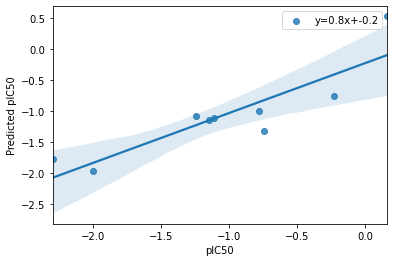

In [37]:
sns.regplot(data=pred,x="pIC50",y="Predicted pIC50",label="y={0:.1f}x+{1:.1f}".format(slope, intercept))
plt.legend();

<h3>Predicting on Blinded Compounds</h3>

In [38]:
blinded["Predicted pIC50"] = model.predict(scaler.transform(blinded.drop(["SMILES","pIC50"],axis=1)))

In [39]:
results = blinded[["SMILES","Predicted pIC50"]]
results

,SMILES,Predicted pIC50
Compound No.,,
6,ClC1=CC(OC(=O)C2=C3C=CC=CC3=CC=C2)=CN=C1,-0.609510
12,CC1=CC(O)=NC(SCC(=O)NC2=CC=C(OC3=CC=C(Cl)C=C3)...,-2.183443
24,CC1=C(C=C(O1)C(C)(C)C)C1=NNC(NS(=O)(=O)C2=CC=C...,-1.568561
25,ClC(Cl)=C(Cl)C(=O)OC1=CC=C(C=C1)S(=O)(=O)C1=CC...,-1.283477
31,O=C1N(CC2=CC=C3C=CC=CC3=C2)C2=CC=C(C=C2C1=O)S(...,-0.839340
37,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-0.436156
43,CC1CCCCN1S(=O)(=O)C1=CC2=C(NC(=O)C2=O)C=C1,-0.359989
59,[O-][N+](=O)C1=CC=C(C=C1)C1=CC=C(O1)C(=O)OC1=C...,0.478993
70,CC(SC1=NC(C2=CC=CC=C2)=C(C#N)C(=O)N1)C(=O)NC1=...,-2.050007


<ul>
    <li>IC50 is the half maximal inhibitory concentration</li>
    <li>Lower the IC50, the more potent the inhibitor</li>
    <li>pIC50 = -log(IC50)</li>
    <li>Higher the pIC50, the more potent the inhibitor</li>
</ul>

In [40]:
results[results["Predicted pIC50"]==results["Predicted pIC50"].max()]

,SMILES,Predicted pIC50
Compound No.,,
59,[O-][N+](=O)C1=CC=C(C=C1)C1=CC=C(O1)C(=O)OC1=C...,0.478993


Compound 59 seems to be the best inhibitor.

In [41]:
results.to_excel("PS3 Predictions - Anirudh Rao.xlsx")

<hr>